#Principal Components Analysis

# Descripción del Dataset

El dataset Breast Cancer Wisconsin (Diagnostic) pertenece al área médica
y se utiliza para la detección de cáncer de mama.

El objetivo del dataset es clasificar tumores como:

- 0 = Maligno
- 1 = Benigno

Los datos fueron obtenidos a partir de imágenes digitalizadas
de muestras tomadas mediante biopsia (Fine Needle Aspirate).

El dataset contiene 30 variables predictoras numéricas.
Estas variables describen características de las células,
como:

- Radio
- Textura
- Perímetro
- Área
- Suavidad
- Compacidad
- Concavidad
- Simetría
- Dimensión fractal

Cada una de estas características se calcula en tres versiones:
- Promedio (mean)
- Error estándar (se)
- Peor valor observado (worst)

En total, el dataset contiene 569 observaciones.

In [5]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,,


#Limpieza de datos

El conjunto de datos contiene una columna de identificación ("id") que no proporciona información predictiva.
Además, el conjunto de datos incluye una columna vacía ("Sin nombre: 32") que solo contiene valores faltantes.

Estas columnas se eliminarán, ya que no contribuyen a la tarea de clasificación.

In [6]:
df.columns

df = df.drop(columns=["id", "Unnamed: 32"])

df.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Ahora verificamos si el conjunto de datos contiene valores faltantes.


In [7]:
df.isnull().sum()


,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


La variable objetivo "diagnóstico" es categórica (M = Maligno, B = Benigno).
Se codificará como:

M → 0
B → 1

Esta codificación convierte el problema en una tarea de clasificación binaria.

In [8]:
df["diagnosis"] = df["diagnosis"].map({"M": 0, "B": 1})

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Análisis de datos

Es importante conocer cuántos casos son benignos y cuántos malignos,
ya que esto nos permite entender si el dataset está balanceado.


In [9]:
df["diagnosis"].value_counts()


,count
diagnosis,
1,357
0,212


Se observa que el dataset contiene más casos benignos que malignos.

Sin embargo, la diferencia no es extremadamente grande,
por lo que el dataset puede considerarse razonablemente balanceado.

Ahora visualizamos la distribución de la variable objetivo mediante una gráfica.


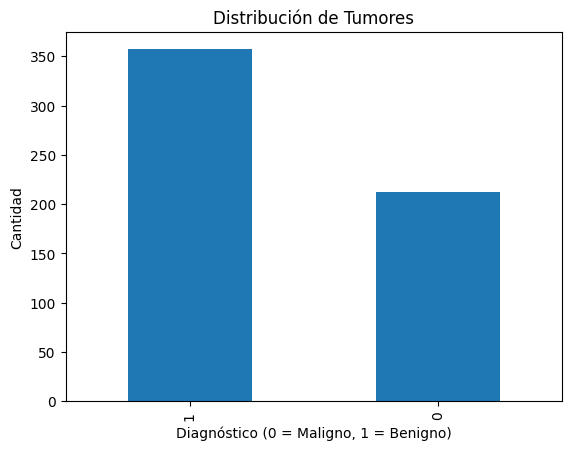

In [10]:
import matplotlib.pyplot as plt

df["diagnosis"].value_counts().plot(kind="bar")
plt.title("Distribución de Tumores")
plt.xlabel("Diagnóstico (0 = Maligno, 1 = Benigno)")
plt.ylabel("Cantidad")
plt.show()


A continuación observamos estadísticas descriptivas de las variables predictoras.

Esto nos permite entender la escala y variabilidad de los datos.


In [11]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Se observa que las variables tienen escalas muy diferentes.

Por ejemplo, algunas variables como "area_mean" tienen valores mucho mayores
que otras como "smoothness_mean".

Es necesario estandarizar los datos antes de aplicar PCA,
ya que PCA es sensible a la escala.


Ahora analizamos la correlación entre variables.



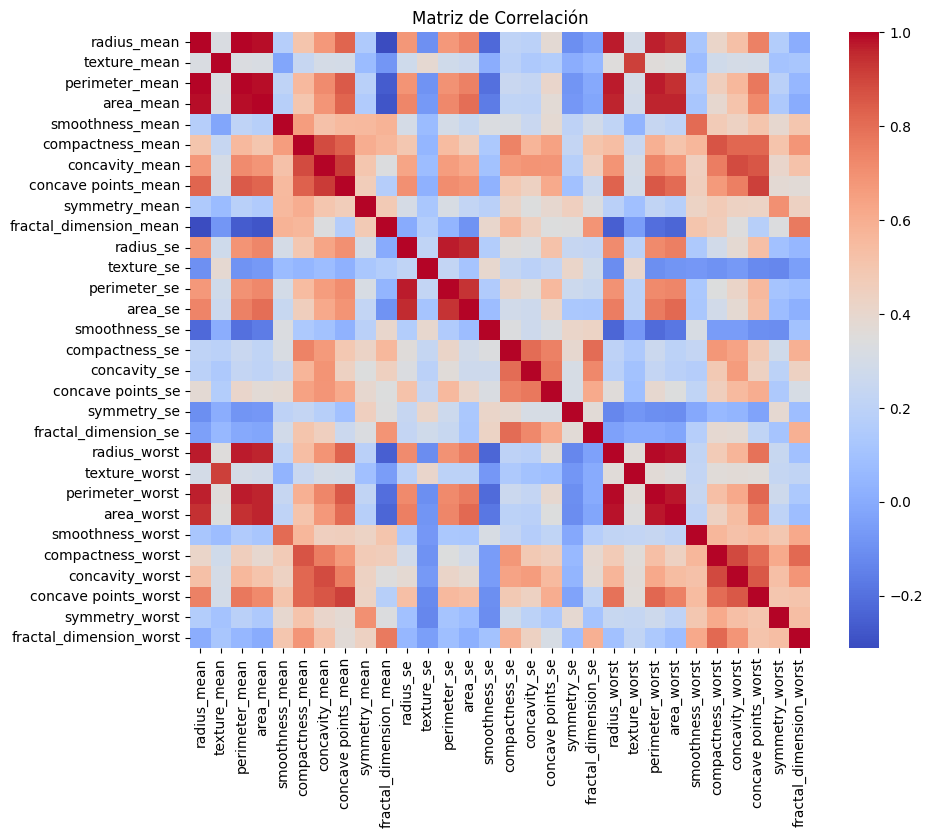

In [12]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.drop("diagnosis", axis=1).corr(), cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


Se observan correlaciones fuertes entre varias variables.

Por ejemplo, variables relacionadas con área, perímetro y radio
presentan alta correlación.

Esto indica que existe redundancia en el dataset.


#Estandarización de los datos

Es necesario estandarizar las variables predictoras.

Si una variable tiene valores mucho más grandes que otras,
puede dominar el análisis y generar resultados incorrectos.

Por esta razón, transformamos cada variable para que tenga:

- Media igual a 0
- Desviación estándar igual a 1


In [13]:
from sklearn.preprocessing import StandardScaler

X = df.drop("diagnosis", axis=1) # Variables predictoras y variable objetivo
y = df["diagnosis"]

scaler = StandardScaler() # Estandarización
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Después de la estandarización, todas las variables tienen media cercana a 0
y desviación estándar igual a 1.

Esto asegura que ninguna variable tenga mayor influencia
simplemente por tener valores más grandes.

#Matriz de covarianza

Valores positivos indican que dos variables aumentan juntas.
Valores negativos indican que cuando una aumenta, la otra disminuye.



In [14]:
import numpy as np

cov_matrix = np.cov(X_scaled.T)

cov_matrix[:5, :5]


array([[ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151],
       [ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969],
       [ 0.99961207,  0.33011322,  1.00176056,  0.98824361,  0.20764309],
       [ 0.98909547,  0.32165099,  0.98824361,  1.00176056,  0.17734005],
       [ 0.17088151, -0.02342969,  0.20764309,  0.17734005,  1.00176056]])

La matriz de covarianza muestra cómo se relacionan las variables entre sí.

Se observan valores altos cercanos a 1,
lo que indica que varias variables están fuertemente relacionadas.

Esto significa que existe redundancia en el dataset.

Por esta razón, PCA es útil, ya que puede reducir
el número de variables sin perder demasiada información.


#Eigenvalores y Eigenvectores

Los eigenvectores representan las nuevas direcciones del espacio.
Estas direcciones se llaman componentes principales.

Los eigenvalores indican cuánta varianza explica cada componente principal.

El componente con mayor eigenvalor será el componente principal número 1 (PC1).


In [15]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues[:10]


array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

Los eigenvalores indican cuánta varianza explica cada componente principal.

El primer eigenvalor (13.30) es mucho mayor que los demás,
lo que significa que el primer componente principal
captura gran parte de la información del dataset.

Los valores disminuyen progresivamente,
lo que indica que los primeros componentes son los más importantes.

Esto sugiere que podemos reducir dimensiones
manteniendo solo los primeros componentes principales.


#Porcentaje de varianza explicada

Cada eigenvalor representa la cantidad de varianza
capturada por un componente principal.

Para determinar cuántos componentes conservar,
calculamos el porcentaje de varianza explicada
por cada componente.


In [16]:
explained_variance = eigenvalues / sum(eigenvalues) # Porcentaje de varianza

explained_variance[:10]


array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

El primer componente principal explica aproximadamente 44% de la varianza total del dataset.

El segundo componente explica alrededor de 19%.

Esto significa que solo los dos primeros componentes ya explican más del 60% de la información total.

Los siguientes componentes explican cada vez menos varianza,
lo que indica que los primeros son los más importantes.



Ahora calculamos la varianza acumulada.
Esto nos permitirá visualizar cuántos componentes
son necesarios para conservar la mayor parte de la información.


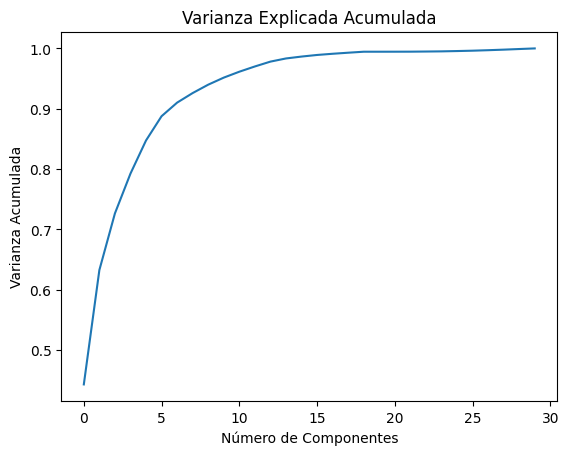

In [17]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(cumulative_variance)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Explicada Acumulada")
plt.show()


La gráfica de varianza acumulada muestra que:

- Con 2 componentes se explica más del 60% de la información.
- Con 5 componentes se alcanza aproximadamente el 89%.
- Con 6 a 8 componentes se supera el 90% de varianza explicada.

Esto indica que no es necesario conservar las 30 variables originales.
Podemos reducir el dataset a aproximadamente 6 u 8 componentes
sin perder demasiada información.


#Visualización con los primeros 2 componentes principales

Ahora aplicamos PCA conservando únicamente los primeros 2 componentes.

Esto nos permitirá visualizar los datos en un plano bidimensional
y observar si existe separación entre tumores benignos y malignos.


In [18]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2) # PCA con 2 componentes
X_pca_2 = pca_2.fit_transform(X_scaled)

df_pca_2 = pd.DataFrame(X_pca_2, columns=["PC1", "PC2"])
df_pca_2["diagnosis"] = y.values

df_pca_2.head()


,PC1,PC2,diagnosis
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


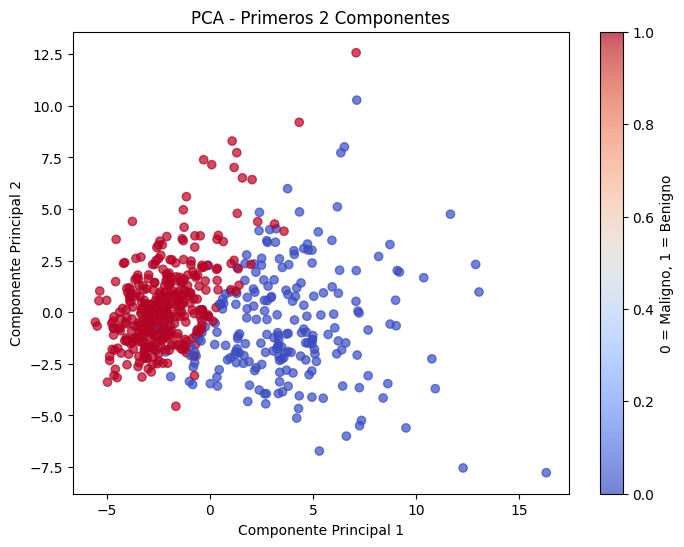

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_pca_2["PC1"],
    df_pca_2["PC2"],
    c=df_pca_2["diagnosis"],
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Primeros 2 Componentes")
plt.colorbar(label="0 = Maligno, 1 = Benigno")
plt.show()


En la gráfica se muestran los datos proyectados en los dos primeros componentes principales.

Se observa una separación bastante clara entre los tumores malignos (0) y benignos (1).

La mayoría de los tumores malignos se agrupan hacia un lado del gráfico,
mientras que los tumores benignos tienden a concentrarse en otra región.

Aunque existe un pequeño traslape entre ambas clases,
la separación general es evidente.

Esto indica que los primeros dos componentes principales
capturan información importante para distinguir entre tumores malignos y benignos,
incluso reduciendo el dataset de 30 variables a solo 2 dimensiones.


#Visualización con los primeros 3 componentes principales

Ahora aplicamos PCA conservando los primeros 3 componentes principales.

Esto nos permitirá observar la estructura del dataset en un espacio tridimensional
y analizar si la separación entre tumores malignos y benignos mejora.


In [20]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3) # Aplicamos PCA con 3 componentes
X_pca_3 = pca_3.fit_transform(X_scaled)

df_pca_3 = pd.DataFrame(X_pca_3, columns=["PC1", "PC2", "PC3"])
df_pca_3["diagnosis"] = y.values

df_pca_3.head()


,PC1,PC2,PC3,diagnosis
0,9.192837,1.948583,-1.123166,0
1,2.387802,-3.768172,-0.529293,0
2,5.733896,-1.075174,-0.551748,0
3,7.122953,10.275589,-3.232790,0
4,3.935302,-1.948072,1.389767,0


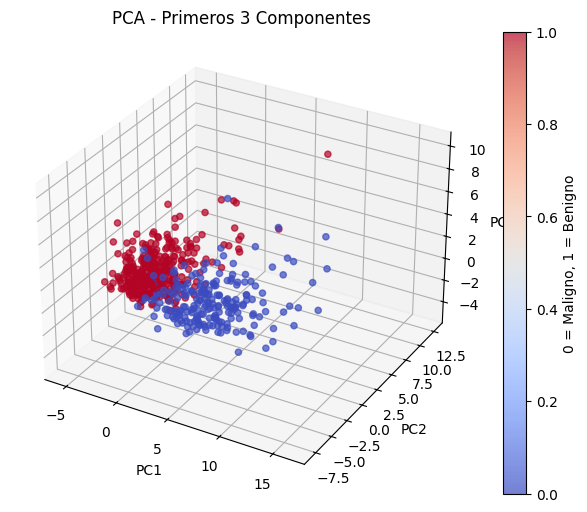

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_3["PC1"],
    df_pca_3["PC2"],
    df_pca_3["PC3"],
    c=df_pca_3["diagnosis"],
    cmap="coolwarm",
    alpha=0.7
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA - Primeros 3 Componentes")

fig.colorbar(scatter, label="0 = Maligno, 1 = Benigno")
plt.show()


La gráfica tridimensional muestra los datos proyectados
sobre los tres primeros componentes principales.

Se observa una separación más clara entre tumores malignos (0)
y benignos (1) en comparación con la gráfica en 2D.

Aunque todavía existe un pequeño traslape,
la estructura general del dataset se mantiene bien definida.

Esto demuestra que los primeros tres componentes principales
capturan la mayor parte de la información relevante del dataset,
permitiendo reducir la dimensionalidad sin perder estructura importante.


#Conclusiones

En este trabajo se aplicó el Análisis de Componentes Principales (PCA)
al dataset Breast Cancer Wisconsin obtenido de Kaggle.

El análisis exploratorio mostró que el dataset contiene
variables altamente correlacionadas,
lo que genera redundancia en la información.

Al aplicar PCA, se observó que:

- El primer componente principal explica aproximadamente 44% de la varianza.
- Los primeros 2 componentes explican más del 60%.
- Con 6 a 8 componentes se supera el 90% de varianza explicada.

Esto demuestra que es posible reducir significativamente
la dimensionalidad del dataset sin perder la mayor parte de la información.

Las visualizaciones en 2D y 3D mostraron una separación clara
entre tumores malignos y benignos,
lo que indica que los primeros componentes principales
conservan información relevante para la clasificación.

Por lo tanto, PCA es una técnica efectiva para este dataset,
ya que reduce la complejidad del modelo,
disminuye redundancia y mantiene la estructura del problema.

El espacio reducido de características es adecuado
para ser utilizado posteriormente en arquitecturas de redes neuronales
para tareas de clasificación.

Dataset Source:

This dataset was obtained from Kaggle:
Breast Cancer Wisconsin (Diagnostic) Dataset
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data